<a href="https://colab.research.google.com/github/VitorSancho/Estudos_EstatisticaParaDSeMLUdemy/blob/main/Curso_Estat%C3%ADstica_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seção 3 - Dados Absolutos e Relativos




In [1]:
import pandas as pd
from google.colab import drive
import numpy as np

## Pencentuais

In [2]:
dados={'emprego':['Adm_banco_de_dados','Programador','Arquiteto'],
       'nova_jersey':[97350,82080,112840],
       'florida':[77140,71540,62310]}

dataset=pd.DataFrame(dados)       

In [3]:
dataset['%_florida']=round((dataset.florida/dataset.florida.sum())*100,2)
dataset['%_nova_jersey']=round((dataset.nova_jersey/dataset.nova_jersey.sum())*100,2)
dataset

,emprego,nova_jersey,florida,%_florida,%_nova_jersey
0,Adm_banco_de_dados,97350,77140,36.56,33.31
1,Programador,82080,71540,33.91,28.08
2,Arquiteto,112840,62310,29.53,38.61


In [4]:
drive.mount('/content/drive')
census=pd.read_csv("/content/drive/My Drive/census.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g4W-Ag5LTTu0mvylqldQPkeFmwPZ3LRQn9oZp1fX9jz_e6DQWJFBmM
Mounted at /content/drive


In [5]:
census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Criando tabela de frequencia para dados categóricos - variável qualitativa ordinal

In [6]:
censo_educacao_renda=census[['education','income']]
censo_agrupado=censo_educacao_renda.groupby(['education','income'])['education'].count()


In [7]:
bacharelado_menor_que_50K,bacharelado_maior_que_50K=censo_agrupado[' Bachelors',' <=50K'],censo_agrupado[' Bachelors',' >50K']

In [8]:
total_bachareis=bacharelado_menor_que_50K+bacharelado_maior_que_50K
percent_maior_que50K=(round(bacharelado_maior_que_50K/total_bachareis,3))*100
percent_menor_que50K=(round(bacharelado_menor_que_50K/total_bachareis,3))*100

print(f'{percent_maior_que50K}% dos bachareis ganham mais de 50K anuais')
print(f'{percent_menor_que50K}% dos bachareis ganham menos de 50K anuais')

41.5% dos bachareis ganham mais de 50K anuais
58.5% dos bachareis ganham menos de 50K anuais


In [9]:
dados={'Ano Graduação':['1°','2°','3°','4°','Total'],
       'Matrículas março':[70,50,47,23,190],
       'Matrículas novembro':[65,48,40,22,175]}

tabela=pd.DataFrame(dados)
tabela['Evasão']=tabela['Matrículas março']-tabela['Matrículas novembro']
tabela['% Evasão']=round(tabela['Evasão']/tabela['Matrículas março'],3)
tabela['evasão a cada 100 alunos']=np.floor(tabela['% Evasão']*100)
tabela

,Ano Graduação,Matrículas março,Matrículas novembro,Evasão,% Evasão,evasão a cada 100 alunos
0,1°,70,65,5,0.071,7.0
1,2°,50,48,2,0.040,4.0
2,3°,47,40,7,0.149,14.0
3,4°,23,22,1,0.043,4.0
4,Total,190,175,15,0.079,7.0


# Seção 4 - Distribuição de frequência

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [11]:
dados=np.array([160,165,167,164,166,160,161,150,152,173,160,155,
                164,168,162,161,168,163,156,155,169,151,170,164,155,
                152,163,160,155,157,156,158,158,161,154,161,156,172,153])

In [12]:
dados=np.sort(dados)
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 161, 161, 161, 161, 162, 163,
       163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172, 173])

In [13]:
minimo=dados.min()
maximo=dados.max()

In [14]:
np.unique(dados,return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 4, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1]))

In [15]:
n=len(dados)
n

39

In [16]:
i=round(1+3.3*np.log10(n))
i

6

In [17]:
Amplitute_geral=maximo-minimo
Amplitute_geral

23

In [18]:
h=math.ceil(Amplitute_geral/i)

## Construção da distribuição de frequência 

In [19]:
intervalos=np.arange(minimo,maximo+2,step=h)
intervalos


array([150, 154, 158, 162, 166, 170, 174])

In [20]:
faixa_de_valores=[0,0,0,0,0,0]

for i in range(n):
  valor=dados[i]

  
  # print(valor)
  for j in range(len(intervalos)):
    # print(faixa)
    # print(j)
    if valor>=intervalos[j] and valor<intervalos[j+1]:
      # print("sim")
      faixa_de_valores[j]=faixa_de_valores[j]+1
          
      continue
faixa_de_valores

[5, 9, 10, 7, 5, 3]

In [21]:
lista_classes=[]

for i in range(len(faixa_de_valores)):
  lista_classes.append(str(intervalos[i]) + "-|" + str(intervalos[i+1]))

lista_classes  

['150-|154', '154-|158', '158-|162', '162-|166', '166-|170', '170-|174']

Text(0, 0.5, 'frequência')

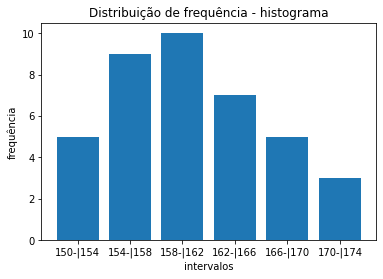

In [22]:
plt.bar(lista_classes,faixa_de_valores)
plt.title('Distribuição de frequência - histograma')
plt.xlabel('intervalos')
plt.ylabel('frequência')

### Distribuição de frequência e histograma com numpy e matplotlib

In [23]:
dados=np.array([160,165,167,164,166,160,161,150,152,173,160,155,
                164,168,162,161,168,163,156,155,169,151,170,164,155,
                152,163,160,155,157,156,158,158,161,154,161,156,172,153])

In [24]:
frequencia,classes=np.histogram(dados,bins=i,range=(minimo,maximo+1))

print(faixa_de_valores)
frequencia,classes


[5, 9, 10, 7, 5, 3]


(array([ 6, 10, 14,  6,  3]),
 array([150. , 154.8, 159.6, 164.4, 169.2, 174. ]))

(array([ 6., 10., 14.,  6.,  3.]),
 array([150. , 154.8, 159.6, 164.4, 169.2, 174. ]),
 <a list of 5 Patch objects>)

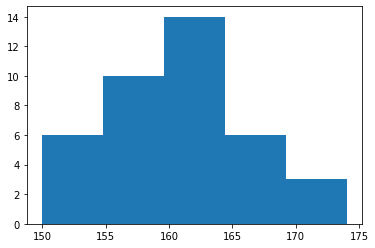

In [25]:
plt.hist(dados,bins=classes)

### Distribuição de frequência e histogramas com pandas e seaborn

In [26]:
dataset=pd.DataFrame({'dados':dados})
dataset.head()

,dados
0,160
1,165
2,167
3,164
4,166


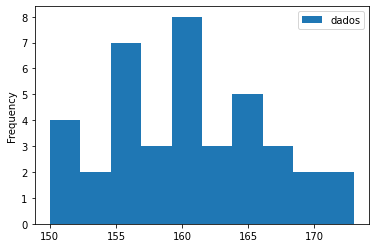

In [27]:
dataset.plot.hist();

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


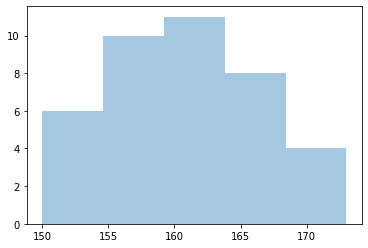

In [28]:
sns.distplot(dados,hist=True,kde=False);

In [30]:
# idades=census['age']
# idades=pd.DataFrame(agrupados)
# menor_idade=idades.min()
# maior_idade=idades.max()

# frequencia,classes=np.histogram(idades,bins=10,range=(menor_idade[0],maior_idade[0]))
# # frequencia,classes

# sns.histplot(idades,kde=False,bins=classes)



### Como fatiar dataset de acordo com lista que é passada como bins

In [31]:
census['age']=pd.cut(census['age'],bins=[0,17,25,40,60,90],
                      labels=['Faixa1','Faixa2','Faixa3','Faixa4','Faixa5'])

In [32]:
census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Regras de associação de acordo com distribuição de frequência

Para construir regras de associação a entrada de dados deve conter dados categóricos

In [33]:
census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
dataset_apriori=census[['age','workclass','education', 'marital-status',
                         'relationship','occupation','sex','native-country','income']]
dataset_apriori.head()

,age,workclass,education,marital-status,relationship,occupation,sex,native-country,income
0,Faixa3,State-gov,Bachelors,Never-married,Not-in-family,Adm-clerical,Male,United-States,<=50K
1,Faixa4,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Exec-managerial,Male,United-States,<=50K
2,Faixa3,Private,HS-grad,Divorced,Not-in-family,Handlers-cleaners,Male,United-States,<=50K
3,Faixa4,Private,11th,Married-civ-spouse,Husband,Handlers-cleaners,Male,United-States,<=50K
4,Faixa3,Private,Bachelors,Married-civ-spouse,Wife,Prof-specialty,Female,Cuba,<=50K


In [35]:
amostra_dataset_apriori=dataset_apriori.sample(n=1000)

Para a utilização da biblioteca que realiza as regras de associação, é necessário transformar os dados em listas

In [36]:
transacoes=[]

for i in range(amostra_dataset_apriori.shape[0]):
    transacoes.append([str(amostra_dataset_apriori.values[i,j]) for j in range(amostra_dataset_apriori.shape[1])])

In [37]:
transacoes[:2]

[['Faixa2',
  ' Private',
  ' HS-grad',
  ' Never-married',
  ' Not-in-family',
  ' Machine-op-inspct',
  ' Male',
  ' United-States',
  ' <=50K'],
 ['Faixa3',
  ' Private',
  ' Some-college',
  ' Married-civ-spouse',
  ' Husband',
  ' Machine-op-inspct',
  ' Male',
  ' United-States',
  ' >50K']]

In [38]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5977 sha256=c9d2382643c904f27ac7701a86175542ab9b77830da2476f47c562f4563ce7d7
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [39]:
from apyori import apriori

min_suport-->estipula um valor mínimo de frequência relativa que um atributo deve ter para que seja considerado na atribuição das regras

________________________________________________________________________________
min_confidence-->define o valor minimo de asociação entre dois atributos para que seja considerado na atribuição da regra

In [40]:
regras=apriori(transacoes,min_suport=0.3,min_confidence=0.2)
resultados=list(regras)

In [41]:
resultados[12]

RelationRecord(items=frozenset({'Faixa2'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Faixa2'}), confidence=0.2, lift=1.0)])

# Seção 5 - Medidas de posição e dispersão

In [42]:
dados=np.array([160,165,167,164,166,160,161,150,152,173,160,155,
                164,168,162,161,168,163,156,155,169,151,170,164,155,
                152,163,160,155,157,156,158,158,161,154,161,156,172,153])

In [43]:
import numpy as np
import statistics
from scipy import stats
import math

Média

In [44]:
statistics.mean(dados)

160

Moda

In [45]:
stats.mode(dados)[0][0]

155

Mediana

In [46]:
statistics.median(dados)

160

In [47]:
np.median(dados)

160.0

Média ponderada

In [48]:
notas=np.array([9,8,7,3])
pesos=np.array([1,2,3,4])

np.average(notas,weights=pesos)

5.8

### Média, Moda e Mediana para distribuição de frequência - dados grupados



In [49]:
dados={'inferior':[150,154,158,162,166,170],
       'superior':[154,158,162,166,170,174],
       'fi':[5,9,11,7,5,3]}

dados_agrupados=pd.DataFrame(dados)
dados_agrupados['xi']=(dados_agrupados['inferior']+dados_agrupados['superior'])/2
dados_agrupados['fi.xi']=dados_agrupados['fi']*dados_agrupados['xi']

acumulado=0
valores_acumulados=[]
for linha in dados_agrupados.iterrows():
  acumulado+=linha[1][2]
  valores_acumulados.append(acumulado)

dados_agrupados['Fi']=valores_acumulados

In [50]:
dados_agrupados

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


### Medidas Separatrizes

In [51]:
dados_impar=[150,151,152,152,153,154,155,155,155]

In [52]:
np.quantile(dados_impar,[0.25,0.5,0.75])
# np.quantile(dados_impar ,0.5)
# np.quantile(dados_impar ,0.75)

array([152., 153., 155.])

In [53]:
stats.scoreatpercentile(dados_impar,[25,50,75])

array([152., 153., 155.])

In [54]:
quartis_dados_impar=pd.DataFrame(dados_impar).quantile([0.25,0.5,0.75])
quartis_dados_impar

,0
0.25,152.0
0.50,153.0
0.75,155.0


In [55]:
quartis_dados_impar=pd.DataFrame(dados_impar)
quartis_dados_impar.describe()

,0
count,9.000000
mean,153.000000
std,1.870829
min,150.000000
25%,152.000000
50%,153.000000
75%,155.000000
max,155.000000
